# Task 2

## Submission by - Sweety Kumari

## Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV

In [ ]:
train_data = pd.read_csv('data.csv')
train_data.head()

## Data Visualization

In [6]:
train_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


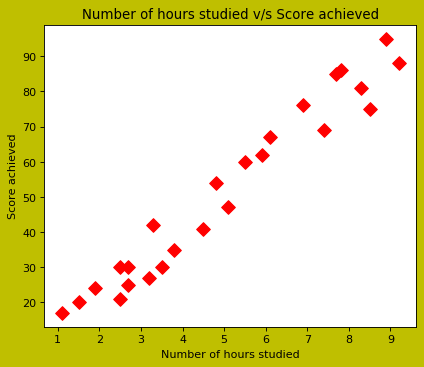

In [4]:
plt.figure(num = None, figsize = (6, 5), dpi = 80, facecolor = 'y', edgecolor = 'b')
plt.scatter(train_data['Hours'],train_data['Scores'],s = 75,c = 'r',marker = 'D')
plt.xlabel('Number of hours studied')
plt.ylabel('Score achieved')
plt.title('Number of hours studied v/s Score achieved')
plt.show()

## Data Preprocessing

In [5]:
sc = StandardScaler()
train_data = sc.fit_transform(train_data)

In [6]:
train_data_new = pd.DataFrame(train_data)
train_data_new.describe()

,0,1
count,2.500000e+01,2.500000e+01
mean,2.042810e-16,1.332268e-16
std,1.020621e+00,1.020621e+00
min,-1.581196e+00,-1.391670e+00
25%,-9.344900e-01,-8.669684e-01
50%,-8.568853e-02,-1.808202e-01
75%,9.652085e-01,9.493062e-01
max,1.692753e+00,1.756539e+00


## Splitting Data 

In [7]:
x_train = train_data[:,0]
y_train = train_data[:,1]

## Hyper-parameter tuning using GridSearch Cross Validation

In [8]:
param_grid = {
    'fit_intercept': [True,False],
    'normalize': [True,False],
    'copy_X': [True,False],
}

model = GridSearchCV(LinearRegression(),param_grid,scoring='neg_root_mean_squared_error',cv = 5)

## Training the model

In [9]:
model.fit(x_train.reshape(-1,1),y_train)
model.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [10]:
y_pred = model.predict(x_train.reshape(-1,1))
y_pred

array([-0.99115392,  0.03472195, -0.71495657,  1.37625195, -0.59658628,
       -1.38572157,  1.6524493 ,  0.19254901,  1.29733842, -0.9122404 ,
        1.06059783,  0.35037607, -0.20201863, -0.67549981, -1.54354863,
        1.534079  , -0.99115392, -1.22789451,  0.4292896 ,  0.94222754,
       -0.9122404 , -0.08364834, -0.47821599,  0.74494371,  1.10005459])

## RMSE value on Training Data

In [11]:
print('RMSE value: ',np.sqrt(mean_squared_error(y_train,y_pred)))

RMSE value:  0.21691427591369924


## R2 Score on training data

In [12]:
print('R2 Score: ',r2_score(y_train,y_pred))

R2 Score:  0.9529481969048356


## Plotting the linear relationship obtained

No handles with labels found to put in legend.


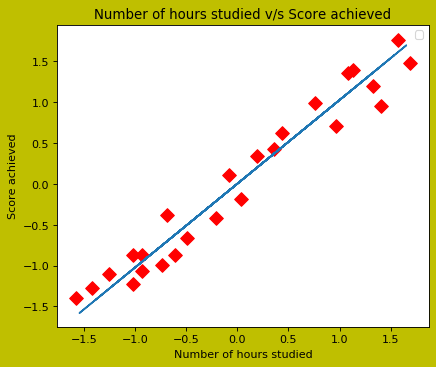

In [13]:
plt.figure(num = None, figsize = (6, 5), dpi = 80, facecolor = 'y', edgecolor = 'b')
plt.scatter(train_data_new[0],train_data_new[1],s = 75,c = 'r',marker = 'D')
plt.plot(y_pred,x_train,label = '')
plt.xlabel('Number of hours studied')
plt.ylabel('Score achieved')
plt.title('Number of hours studied v/s Score achieved')
plt.legend()
plt.show()

## Prediction on a new data point

In [14]:
x = np.array(9.25)
ans = model.predict(x.reshape(-1,1))
print(ans)

[9.02976357]


## If a student study for 9.25 hrs in a day, the predicted score will be =  [90.29763568], 
## which is correct according to the data given as at 9.2 hours the predicted score is : 88.


